# 오차역전파법(backpropagation)
## 계산 그래프
- 계산과정을 그래프로 나타낸 것
- 구성: 복수의 노드와 에지
- 문제풀이 과정
  - 계산 그래프를 구성한다.
  - 그래프에서 계산을 왼쪽에서 오른쪽으로 진행한다.
- 개념
  - 순전파(foward propagation): 계산을 왼쪽에서 오른쪽으로 진행하는 단계
  - 역전파(backward propagation) 반대방향, 즉 계산을 오른쪽에서 왼쪽으로 진행하는 단계
ex) 노드와 계산 결과를 계산 그래프로 그렸을 때
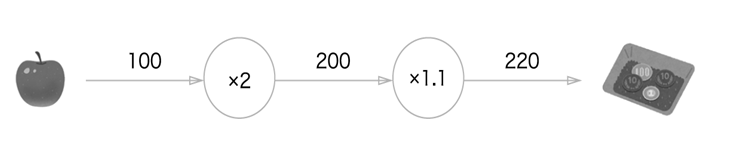

ex2) 계산 그래프에서 사과의 개수와 소비세를 변수로 취급하는 경우
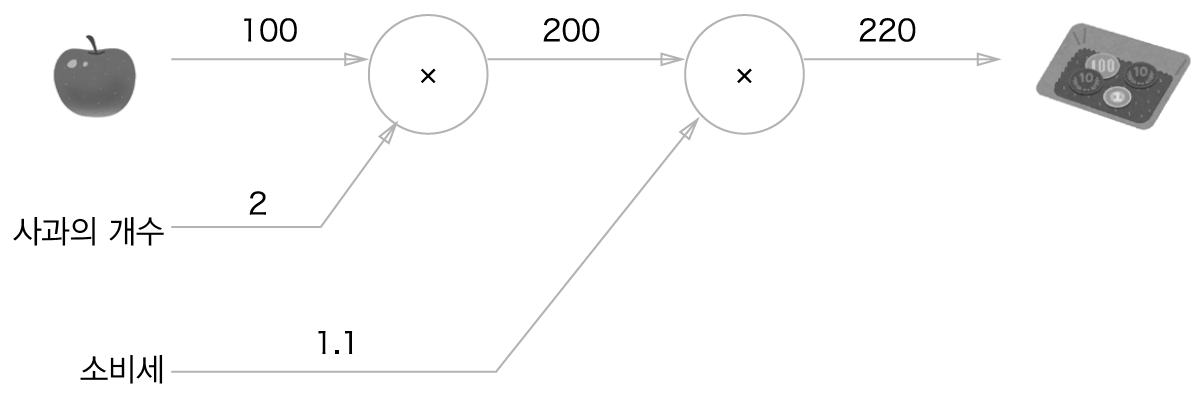


- 계산 그래프의 특징은 '국소적 계산'을 전파함으로써 최종 결과를 얻는다.
  - 국소적이란 날은 '자신과 직접 관계된 작은 범위'라는 의미
  - 즉 전체를 신경쓰지 않고 자신과 관계된 정보만으로 결과를 출력할 수 있다.
- 계산그래프로 푸는 이유
  - 중간 계산 결과를 모두 보관할 수 있다.
  - 역전파를 통해 '미분'을 효율적으로 계산할 수 있다.

## 연쇄법칙
- '국소적 미분'을 전달하는 원리이다.
- 역전파의 계산 절차는 신호 E에 노드의 국소적 미분($\frac{\partial y}{\partial x}$)을 곱한 후 다음 노드로 전달한다.
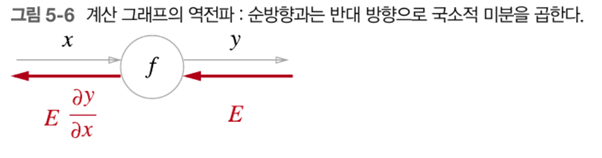
- 합성함수: 여러 함수로 구성된 함수
- 연쇄법칙은 합성 함수의 미분에 대한 성질이다.
  - 합성 함수의 미분은 합성 함수를 구성하는 각 함수의 미분의 곱으로 나타낼 수 있다.
- 역전파의 계산절차: 노드로 들어온 입력 신호에 그 노드의 국소적 미분(편미분)을 곱한 후 다음 노드로 전달

## 역전파
### 덧셈 노드의 역전파
- z = x + y 기준
- 덧셈 노드 역전파는 입력 신호를 다음 노드로 출력한다.
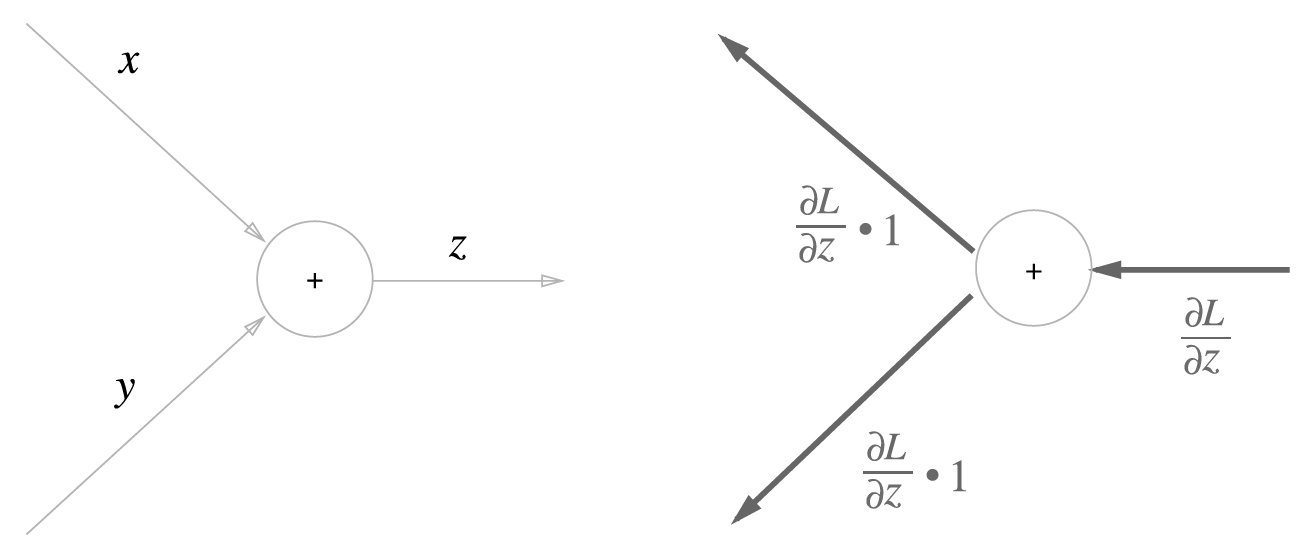

### 곱셈노드의 역전파
- z = xy 기준
- 상류의 값에 순전파 때의 입력 신호들을 '서로 바꾼 값'을 곱해서 하류로 보낸다.
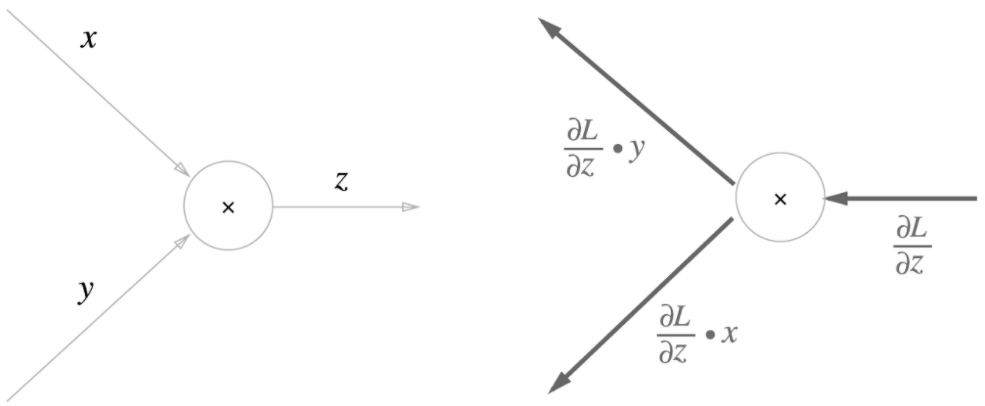

## 단순한 계층 구현하기
### 곱셈 계층

In [1]:
class MulLayer:
  def __init__(self):
    self.x = None
    self.y = None

  def forward(self, x, y):
    self.x = x
    self.y = y
    out = x * y

    return out


  def backward(self, dout):
    dx = dout * self.y
    dy = dout * self.x

    return dx, dy

In [2]:
apple = 100
apple_num = 2
tax = 1.1

#계층들
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

#순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print("--- 순전파의 결과값 ---")
print(price)

#역전파
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print("--- 역전파의 결과값 ---")
print(dapple, dapple_num, dtax)

--- 순전파의 결과값 ---
220.00000000000003
--- 역전파의 결과값 ---
2.2 110.00000000000001 200


### 덧셈 계층

In [3]:
class AddLayer:
  def __init__(self):
    pass

  def forward(self, x, y):
    out = x + y
    return out

  def backward(self, dout):
    dx = dout * 1
    dy = dout * 1
    return dx, dy

In [5]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# layer
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)  # (1)
orange_price = mul_orange_layer.forward(orange, orange_num)  # (2)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)  # (3)
price = mul_tax_layer.forward(all_price, tax)  # (4)

# backward
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)  # (4)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)  # (3)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)  # (2)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)  # (1)

print("---순전파---")
print("price:", int(price))
print("---역전파---")
print("dApple:", dapple)
print("dApple_num:", int(dapple_num))
print("dOrange:", dorange)
print("dOrange_num:", int(dorange_num))
print("dTax:", dtax)

---순전파---
price: 715
---역전파---
dApple: 2.2
dApple_num: 110
dOrange: 3.3000000000000003
dOrange_num: 165
dTax: 650
